In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from matplotlib import pyplot as plt

The dataset we got from Kaggle has information on Ethereum from March 10th, 2016 to August 9th, 2021. We will try to predict a daily high price for a day we got from the dataset. We will do that by training the data using a train test split and getting the hghest accuracy score possible.

In [2]:
ethereumData = pd.DataFrame(pd.read_csv("Ethereum.csv"))
ethereumData = ethereumData.drop("Date", axis = 1)
ethereumData.head(5)

,SNo,Price,Open,High,Low,Vol.,Change %
0,1,11.75,11.20,11.85,11.07,0.0,4.91
1,2,11.95,11.75,11.95,11.75,180.0,1.70
2,3,12.92,11.95,13.45,11.95,830.0,8.12
3,4,15.07,12.92,15.07,12.92,1300.0,16.64
4,5,12.50,15.07,15.07,11.40,92180.0,-17.05


Plot high prices so we can visualize a little bit

Text(0, 0.5, 'Highest Price on the day')

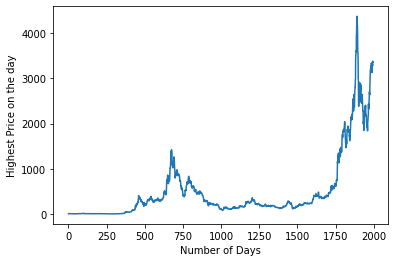

In [3]:
x = ethereumData["SNo"]
y = ethereumData["High"]
plt.plot(x, y)
plt.xlabel("Number of Days")
plt.ylabel("Highest Price on the day")

As we can see from the graph the coin was most valuabe around the 1,800th day. The price on that day was $4,865.57

Declaring model that will be used.

In [4]:
model = GaussianNB()

Diving the given data into a features matrix and target array.

In [5]:
#remove high for the day because that is what we want to predict
X_ethereum = ethereumData.drop("High", axis = 1)
X_ethereum.head(5)

,SNo,Price,Open,Low,Vol.,Change %
0,1,11.75,11.20,11.07,0.0,4.91
1,2,11.95,11.75,11.75,180.0,1.70
2,3,12.92,11.95,11.95,830.0,8.12
3,4,15.07,12.92,12.92,1300.0,16.64
4,5,12.50,15.07,11.40,92180.0,-17.05


In [6]:
y_ethereum = ethereumData["High"]
y_ethereum = y_ethereum.astype(int)
#y_ethereum = y_ethereum[:, np.newaxis]

Make sure they are the same dimensions so we can use them to train

In [7]:
print(X_ethereum.shape)
print(y_ethereum.shape)

(1994, 6)
(1994,)


Setting up train and test split. 75% train and 25% test.

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_ethereum, y_ethereum, test_size=0.25, random_state=0)

Fitting the model to our data

In [9]:
model.fit(Xtrain, ytrain)
predictModel = model.predict(Xtest)

Getting our score to see how accurate it is

In [10]:
accuracy_score(ytest, predictModel)

0.04609218436873747

As we can see this model preforms very poorly giving an accuracy score of 4%. Lets try another model.

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model2 = LogisticRegression()

In [20]:
model2.fit(Xtrain, ytrain)
predictModel2 = model2.predict(Xtest)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
accuracy_score(ytest, predictModel2)

0.002004008016032064

It seems that classification algorithms are performing exactly the same.
Very poorly. Lets try some regression algorithms.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

We have to import mean absolute error to see how accurate a regression algorithm is. Unfortunatly the accuracy score only works for classification

In [22]:
model3 = LinearRegression(fit_intercept=True)

In [23]:
model3.fit(Xtrain, ytrain)
predictModel3 = model3.predict(Xtest)

In [24]:
mean_absolute_error(ytest, predictModel3)

7.421753384892537

This is not to bad as it means that the average difference between the predicted value and actual value is 7.42. Let's see if we can get a better score using a different regression algorithm.

In [25]:
from sklearn.svm import SVR

In [26]:
model4 = SVR()

In [27]:
model4.fit(Xtrain, ytrain)
predictModel4 = model4.predict(Xtest)

In [28]:
mean_absolute_error(ytest, predictModel4)

390.44457127083706

The support value regression preformed terribly. It seems that the best model to use to predict the high of Ethereum is Linear Regression. We could apply this same model to predict any of the other categories that the data set gave us. If given even more data and more time we could use text features such as tweets from influential people in the crypto circle to predict values for the future. Such as if since Elon Musk tweeted about a coin we can expect it to rise in price and have a larger high value for the day tomorrow.